In [1]:
import numpy           as np
import gym
import Portfolio_Gym
import A2C_tf          as A2C
import Factors_Wrapper as Wrapper
# Base Env speed: 20 iterattions/sec
# Agent Env speed: 5 iterrations/sec

# Single Asset Merton Model

100%|██████████| 20000/20000 [22:52<00:00, 14.79it/s] 


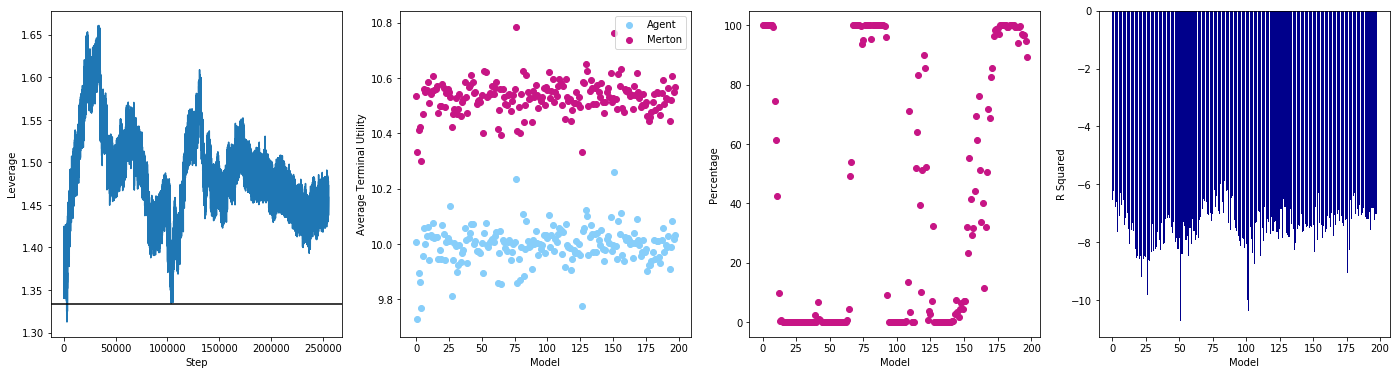

In [9]:
# Model Parameters.
Gamma  = 0.999
N_Episodes  = 20000

Actor_Hypers   = {"Learning Rate" : 0.001,
                  "Epoch"         : 10,
                  "Network Size"  : [16,8],
                  "Activation"    : "Sigmoid",
                  "Alpha"         : 0}

Critic_Hypers = {"Learning Rate" : 0.001,
                 "Epoch"         : 10,
                 "Network Size"  : [32, 8],
                 "Alpha"         : 0.0}

# Critic_Hypers = {'power' : 4}
# Function to facilitate mulitprocessing.
Merton_Env = gym.make('Simulated-v0')
Merton_Env.Set_Params(Mu = 0.01, Sigma = 0.11, Row = 1, Rf = 0.0052,
                      Max_Leverage  = 750,
                      Min_Leverage  = -750,
                      Time_Horizon  = 1,
                      Time_Step     = 1/100,
                      Risk_Aversion = 0.9,
                      State_Corrolations = [0.2, 0.5])

myAC = A2C.Actor_Critic(Merton_Env, Actor_Hypers, Critic_Hypers, Gamma = Gamma, 
                        Sigma_Range = [1, 0.1], Sigma_Anneal = 0.5, Retrain_Frequency = 25)

myWrapper = Wrapper.Factors_Wrapper(myAC)
myWrapper.Train(N_Episodes, Plot = ['Mu', 'R_Squared', 'Merton_Benchmark', 'Percent_Merton_Action'])


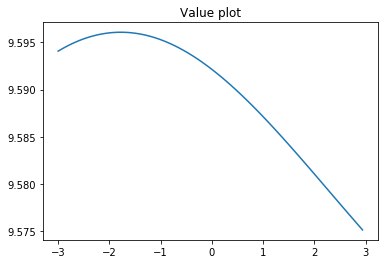

In [10]:
myWrapper.Diagnos_Charts(show='Critic', factor=3)